In [1]:
import os
import sys
import pandas as pd
import numpy as np
import healpy as hp
import matplotlib
from matplotlib import pyplot as plt

sys.path.append("../modules/")
from DS_healpix_fragmentation import radec2pix
from DS_Planck_Unet import east_val, west_val
%config InlineBackend.figure_format = 'retina'

In [5]:
matplotlib.rcParams["font.size"] = 15

In [3]:
def pic_df(filename: str, name: str = None, nside: int = 2**7):
    df = pd.read_csv(filename)
    if name is None:
        name = os.path.basename(filename)
        name = name[:name.index(".")]
    
    a = np.zeros(hp.nside2npix(nside))
    a[radec2pix(df['RA'], df['DEC'], nside)] = 1
    hp.mollview(a, nest=True, cbar=False, title=name)

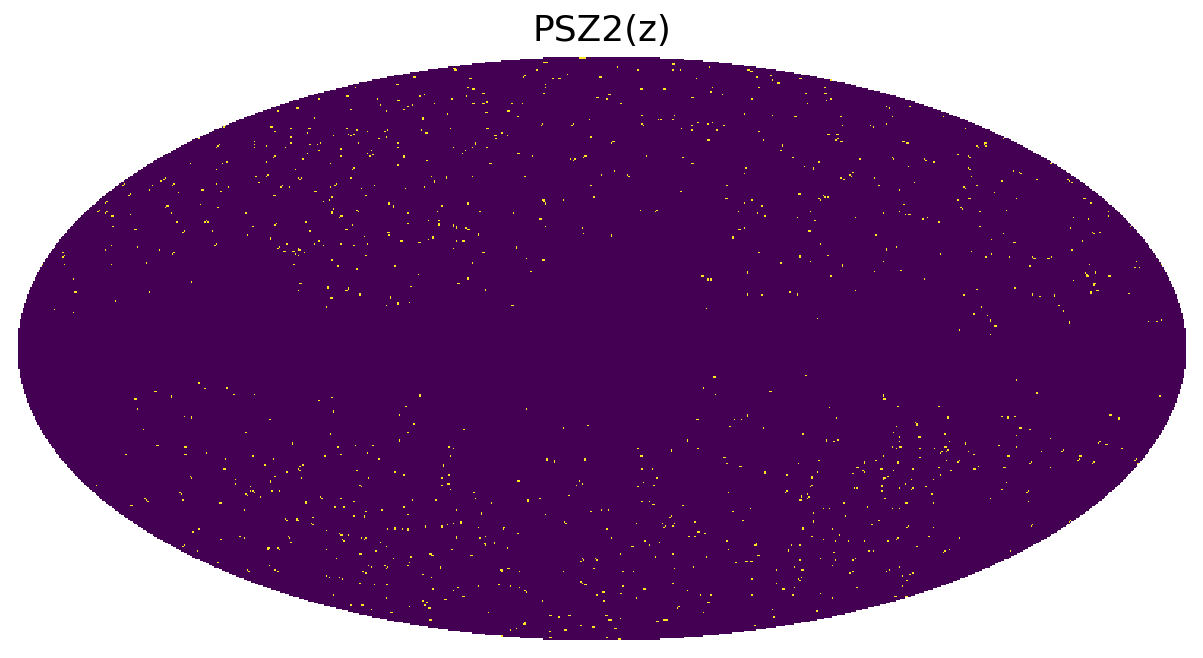

In [6]:
pic_df("../Data/cut_cats/PSZ2_z_.csv", name="PSZ2(z)")

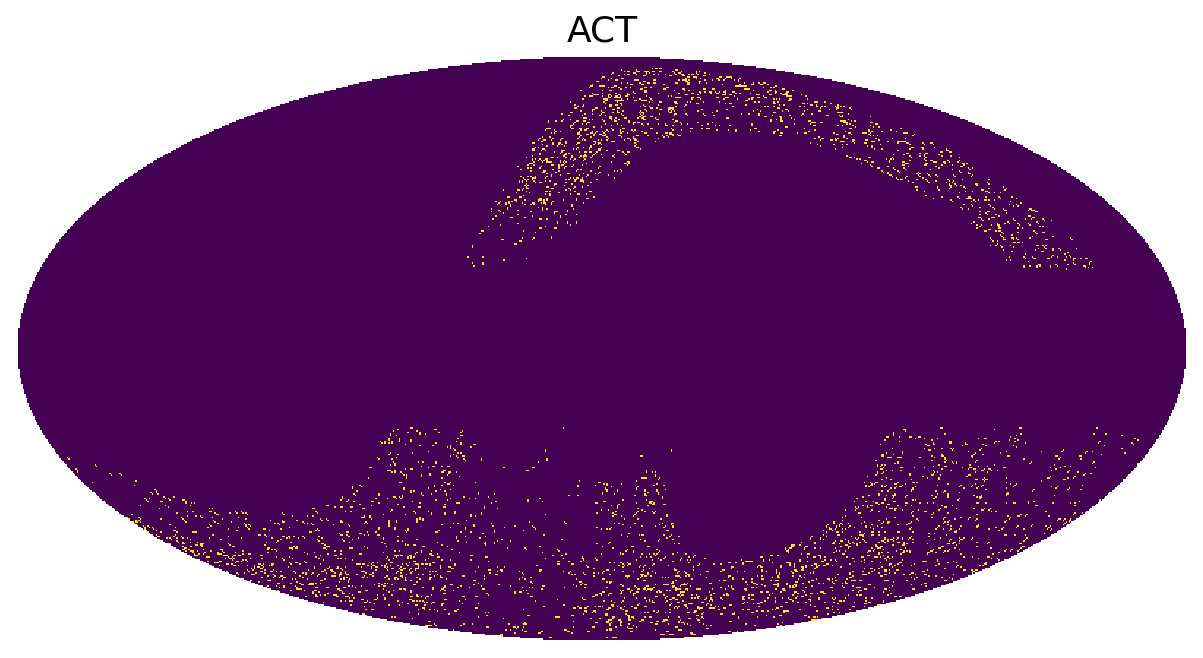

In [7]:
pic_df('../Data/original_cats/ACT.csv')

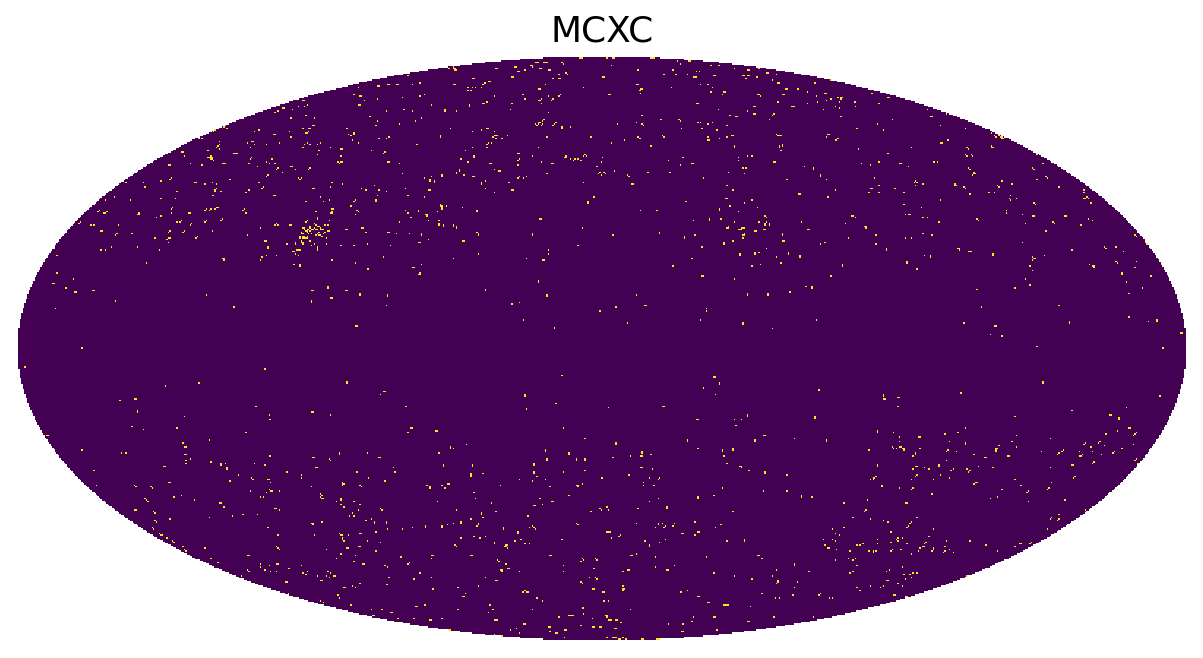

In [8]:
pic_df('../Data/original_cats/MCXC.csv')

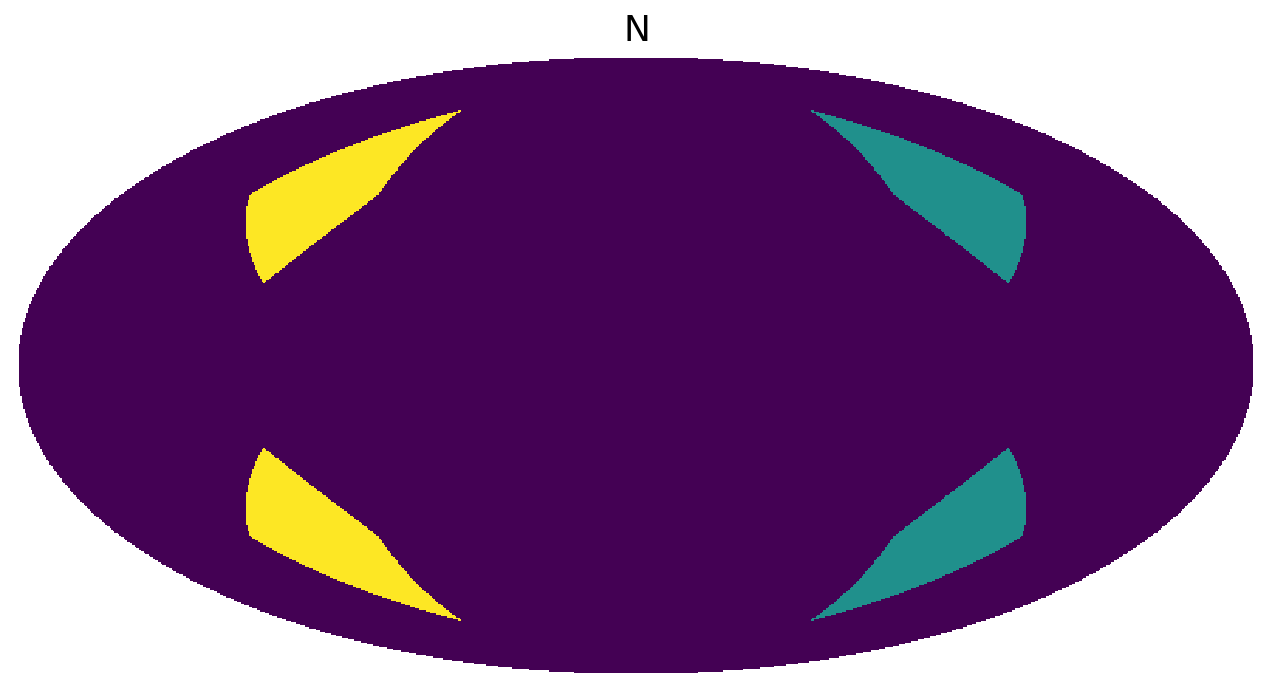

In [6]:
f = plt.figure(num=0, figsize=(9, 7))
a = np.zeros(hp.nside2npix(2))
a[east_val] = 2
a[west_val] = 1
hp.mollview(a, nest=True, cbar=False, fig=0, title="N")